In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#python version
import sys
print('Python version', sys.version)

Python version 3.7.7 (default, Mar 26 2020, 10:32:53) 
[Clang 4.0.1 (tags/RELEASE_401/final)]


## Data explication:

https://www.kaggle.com/c/titanic/data

**Variable	Definition	Key**
- survival	Survival	0 = No, 1 = Yes
- pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
- sex	Sex	
- Age	Age in years	
- sibsp	# of siblings / spouses aboard the Titanic	
- parch	# of parents / children aboard the Titanic	
- ticket	Ticket number	
- fare	Passenger fare	
- cabin	Cabin number	
- embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

Only three vars numerical: Age, Sibsp, Parch, Fare

In [45]:
X_train = pd.read_csv('titanic/train.csv', decimal= '.', dtype={'PassengerId':'category', 
                                                      'Survived':'category', 
                                                      'Pclass':'category',
                                                      'Name': 'category',
                                                      'Sex': 'category',
                                                      'Ticket':'category',
                                                      'Cabin': 'category',
                                                      'Embarked': 'category'
                                                 })

X_test = pd.read_csv('titanic/test.csv', decimal= '.', dtype={'PassengerId':'category', 
                                                      'Survived':'category', 
                                                      'Pclass':'category',
                                                      'Name': 'category',
                                                      'Sex': 'category',
                                                      'Ticket':'category',
                                                      'Cabin': 'category',
                                                      'Embarked': 'category'
                                                 })

In [46]:
y_train = X_train['Survived']
X_train = X_train.drop('Survived', axis=1)

In [47]:
df = pd.concat([X_train, X_test])
assert df.shape[0] == X_train.shape[0] + X_test.shape[0], 'error'

In [48]:
print(X_train.shape,X_test.shape)
print(df.shape)

(891, 11) (418, 11)
(1309, 11)


In [64]:
df['PassengerId'] = df['PassengerId'].astype('category')
df['Name'] = df['Name'].astype('category')
df['Ticket'] = df['Ticket'].astype('category')
df['Cabin'] = df['Cabin'].astype('category')

In [65]:
df.dtypes

PassengerId    category
Pclass         category
Name           category
Sex            category
Age             float64
SibSp             int64
Parch             int64
Ticket         category
Fare            float64
Cabin          category
Embarked       category
dtype: object

In [71]:
num_feats = df.dtypes[(df.dtypes != 'category')].index
cat_feats = df.dtypes[(df.dtypes == 'category')].index

## Missing values

In [101]:
total = df.isnull().sum().sort_values(ascending=False)
df_tmp = pd.concat([total, round(total/df.shape[0]*100, 1)], axis=1, keys=['Total', 'Percent'])
df_tmp[df_tmp['Total'] > 0]

,Total,Percent
Cabin,1014,77.5
Age,263,20.1
Embarked,2,0.2
Fare,1,0.1


In [144]:
#age
df = df.fillna(value={'Age':round(df['Age'].mean())})
#Fare
df = df.fillna(value={'Fare': round(df['Fare'].mean())})

In [147]:
#Embarked
df['Embarked'].value_counts()
df = df.fillna(value={'Embarked': 'S'})

In [148]:
#Cabin ???

## Etude de la cible

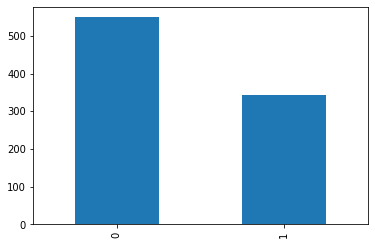

In [197]:
#bcse this is series
y_train.value_counts().plot(kind='bar');

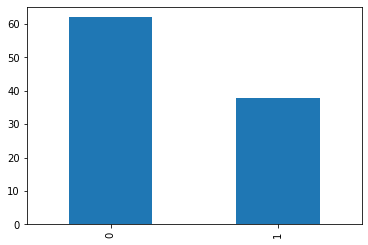

In [203]:
round(y_train.value_counts()/len(y_train)*100).plot(kind='bar');

## Univariate analysis

### Quanti

In [162]:
#Quanti
df['Fare'].describe().astype(('int'))

count    1309
mean       33
std        51
min         0
25%         7
50%        14
75%        31
max       512
Name: Fare, dtype: int64

''

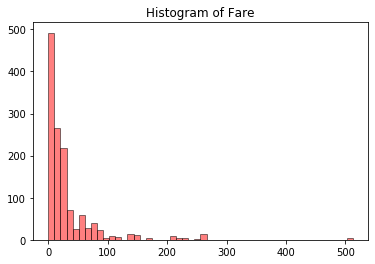

In [173]:
#density=True
#edgecolor='b'
#facecolor='r'
fig, ax = plt.subplots()
ax.hist(df['Fare'], bins=50, facecolor='r', edgecolor='black', alpha=0.5)
ax.set_title('Histogram of Fare')
;

### Quali

In [204]:
import seaborn as sns

''

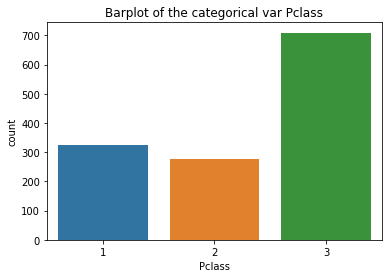

In [210]:
#barplot
ax = sns.countplot(x='Pclass', data=df)
ax.set_title('Barplot of the categorical var Pclass')
;

## Bivariate

### Quali / quanti

''

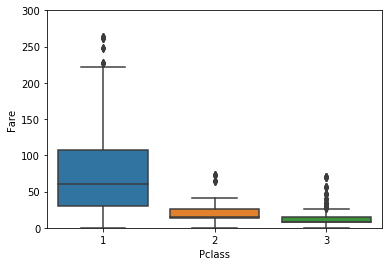

In [214]:
ax = sns.boxplot(x='Pclass', y='Fare', data=df)
ax.set_ylim((0,300))
;

### Quanti / quanti

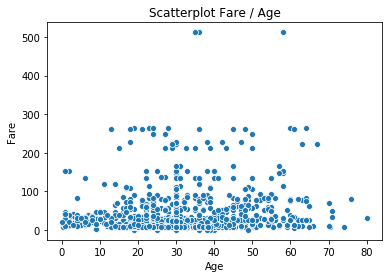

In [218]:
ax = sns.scatterplot(x='Age', y='Fare', data=df)
ax.set_title('Scatterplot Fare / Age');

### Quali / quali

In [224]:
#tableau de contingence en effectif
#margins=True if you want to add the total
pd.crosstab(df['Pclass'], df['Sex'], margins=True)

Sex,female,male,All
Pclass,,,
1,144,179,323
2,106,171,277
3,216,493,709
All,466,843,1309


In [228]:
#tableau de contingence en %
round(pd.crosstab(df['Pclass'], df['Sex'], normalize='all', margins=True)*100)

Sex,female,male,All
Pclass,,,
1,11.0,14.0,25.0
2,8.0,13.0,21.0
3,17.0,38.0,54.0
All,36.0,64.0,100.0


In [231]:
#Profils lignes
round(pd.crosstab(df['Pclass'], df['Sex'], normalize='columns', margins=True)*100)

Sex,female,male,All
Pclass,,,
1,31.0,21.0,25.0
2,23.0,20.0,21.0
3,46.0,58.0,54.0


In [232]:
#Profils colonnes
round(pd.crosstab(df['Pclass'], df['Sex'], normalize='index', margins=True)*100)

Sex,female,male
Pclass,,
1,45.0,55.0
2,38.0,62.0
3,30.0,70.0
All,36.0,64.0


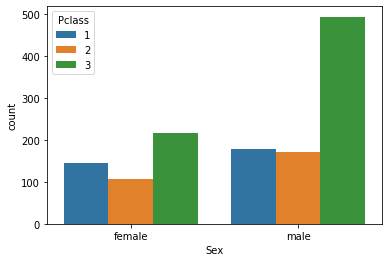

In [236]:
#graph
sns.countplot(x='Sex', hue='Pclass', data=df);

## Advanced graph

#[to be continued]